In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [26]:
messi = "../../image4labs/messi.jpg"

openCV_logo = "../../image4labs/openCV_logo_white.png"

<function matplotlib.pyplot.show(close=None, block=None)>

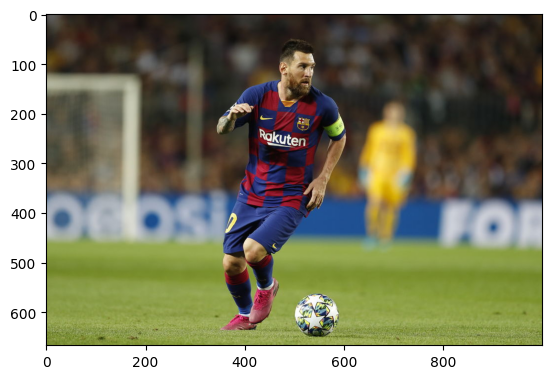

In [24]:
img = cv.imread(messi)[..., ::-1]
assert img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(img)
plt.show

In [30]:
px = img[100, 100]  # получаем значения цвета пикселя
print(px)
blue = img[100, 100, 1]  # только синимй пиксель
print(blue)

[59 43 30]
43


In [31]:
# кортеж из числа строк, столбцов и каналов (если изображение цветное):
print(img.shape)
print(img.size)  # кол во пикселей всего

(667, 1000, 3)
2001000


<function matplotlib.pyplot.show(close=None, block=None)>

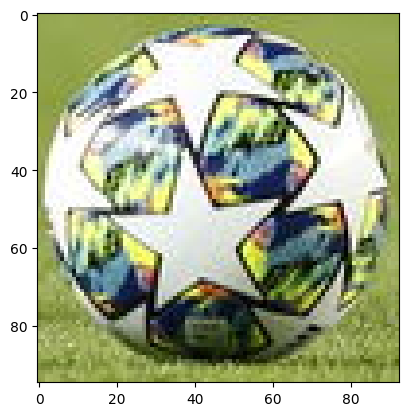

In [32]:
ball = img[560:655, 500:593]  # делаем выборку сначала Y координат, а потом X
plt.imshow(ball)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

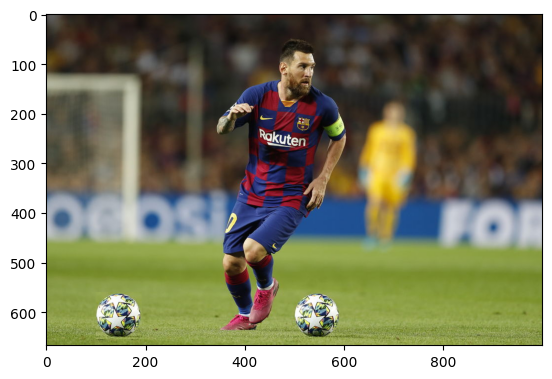

In [33]:
img[560:655, 100:193] = ball
plt.imshow(img)
plt.show

In [34]:
# получаем выборку всех синих викселей, потому что ццвета идут в порядке RGB
b = img[:, :, 0]
print(b)

[[ 79  82  85 ...  61  61  61]
 [ 80  82  85 ...  61  61  61]
 [ 80  82  86 ...  59  60  60]
 ...
 [116 120 117 ... 149 153 141]
 [116 120 117 ... 146 150 140]
 [117 121 117 ... 144 146 138]]


<function matplotlib.pyplot.show(close=None, block=None)>

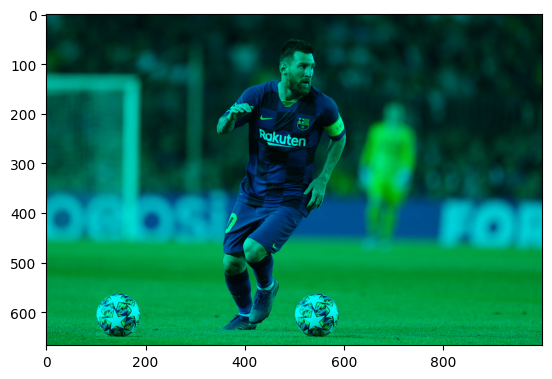

In [35]:
img1 = img
img1[:, :, 0] = 0  # если мы захотим обнулть весь красный цвет
plt.imshow(img1)
plt.show

### Создание рамки


**src** - input image

**top, bottom, left, righ**t - border width in number of pixels in corresponding directions

**borderType** - Flag defining what kind of border to be added. It can be following types: - cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument. - cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb - cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba - cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh - cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg

**value** - Color of border if border type is cv.BORDER_CONSTANT```


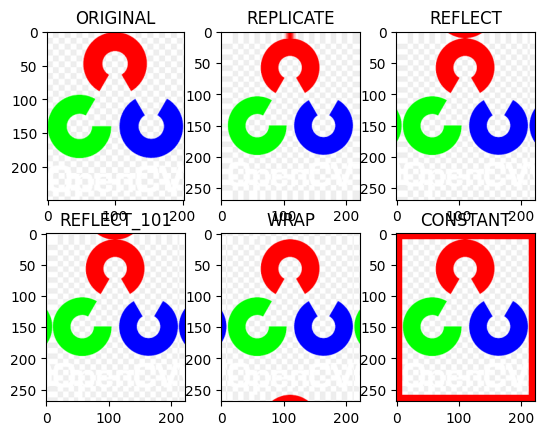

In [27]:
BLUE = [255, 0, 0]

img1 = cv.imread(openCV_logo)[..., ::-1]
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_WRAP)
constant = cv.copyMakeBorder(
    img1, 10, 10, 10, 10, cv.BORDER_CONSTANT, value=BLUE)

plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

## Добавление изображения


In [37]:
x = np.uint8([250])
y = np.uint8([10])

print(cv.add(x, y))  # 250+10 = 260 => 255

print(x+y)           # 250+10 = 260 % ​​256 = 4

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


In [38]:
ball.shape

(95, 93, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

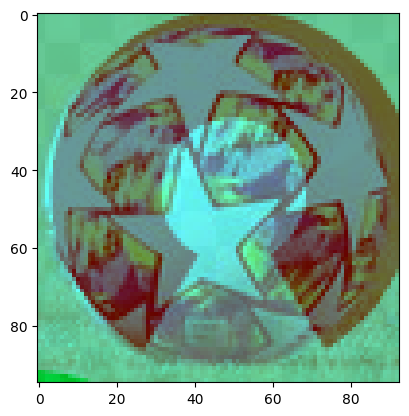

In [39]:
crop = img1[1:96, 50:143]

# добавляем веса для акцентирования
dst = cv.addWeighted(crop, 0.4, ball, 0.6, 0)

plt.imshow(dst)
plt.show

## Побитовые операции с изображениями


<function matplotlib.pyplot.show(close=None, block=None)>

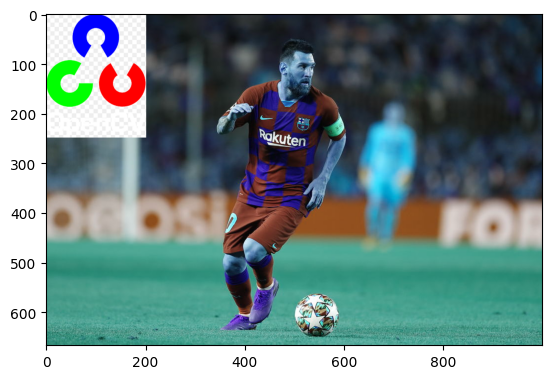

In [50]:
# Load two images
img1 = cv.imread(messi)
img2 = cv.imread(openCV_logo)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

plt.imshow(img1)
plt.show

## Масштабирование


In [ ]:
cards = "../../image4labs/cards.jpeg"

<function matplotlib.pyplot.show(close=None, block=None)>

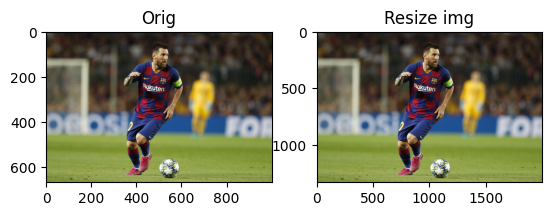

In [42]:
import numpy as np
import cv2 as cv

img = cv.imread(messi)[..., ::-1]
assert img is not None, "file could not be read, check with os.path.exists()"


res = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

# OR

height, width = img.shape[:2]
res = cv.resize(img, (2*width, 2*height), interpolation=cv.INTER_CUBIC)

plt.subplot(121), plt.imshow(img), plt.title("Orig")
plt.subplot(122), plt.imshow(res), plt.title("Resize img")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

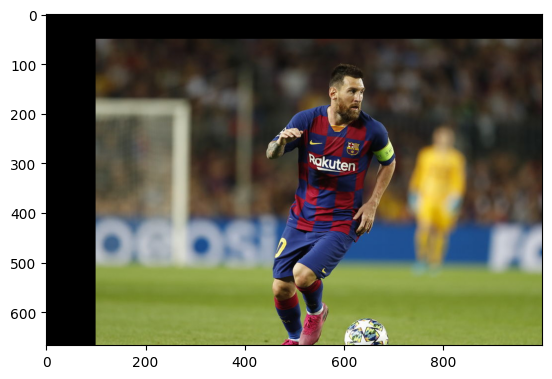

In [43]:
img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
rows, cols = img_grey.shape

M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

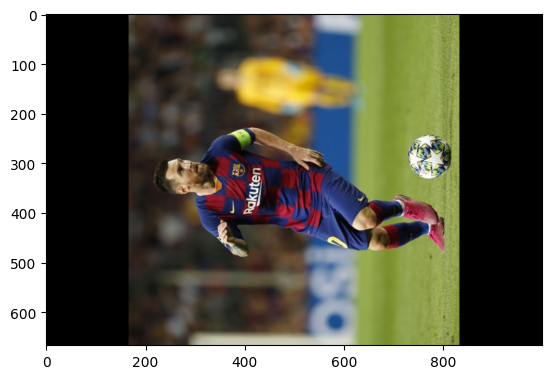

In [44]:
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

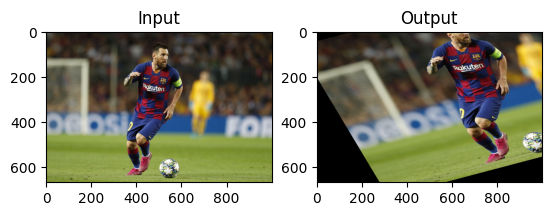

In [45]:
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv.getAffineTransform(pts1, pts2)

dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show

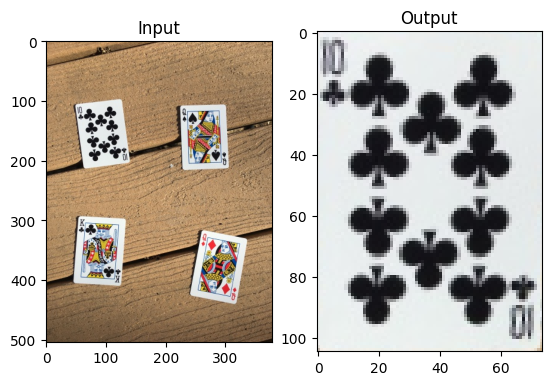

In [46]:
img = cv.imread(cards)[..., ::-1]
assert img is not None, "file could not be read, check with os.path.exists()"

pts1 = np.float32([[50, 108], [124, 100], [64, 213], [141, 203]])
pts2 = np.float32([[0, 0], [74, 0], [0, 105], [74, 105]])

M = cv.getPerspectiveTransform(pts1, pts2)

dst = cv.warpPerspective(img, M, (74, 105))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()